In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import wget
from scipy import optimize
from scipy.stats import chi2

In [2]:
d = pd.read_csv("/Users/juana/Dropbox/2023-10/MetodosComputacionales/metodos-computacionales-1/Parcial4/DataRotacion.csv",sep=",", header=0) 

In [3]:
lambda10 = d.query('angle ==10')
lambda20 = d.query('angle ==20')
lambda30 = d.query('angle ==30')
lambda40 = d.query('angle ==40')
lambda50 = d.query('angle ==50')
lambda60 = d.query('angle ==60')

In [4]:
def modelo(h, angle, g, p):
    C = (2*np.sqrt(2))/3
    return C*p*np.cos(np.radians(angle))*np.sqrt(h**3/g)

In [5]:
def Chi2(h, y, sigmay, angle, g, p):
    return np.sum (  (y-modelo(h, angle, g, p))**2/(2*sigmay**2) )

In [6]:
lmb = lambda p: Chi2(lambda30['h'], lambda30['y'], lambda30['sigmay'], lambda30['angle'], 9.81, p)
omegahat=optimize.minimize(lmb, x0=[1], method='Nelder-Mead').x[0]
o = np.array(modelo(lambda30['h'], lambda30['angle'], 9.81, omegahat))

In [7]:
omegahat

7.243156433016658e-05

Text(0, 0.5, 'y[m]')

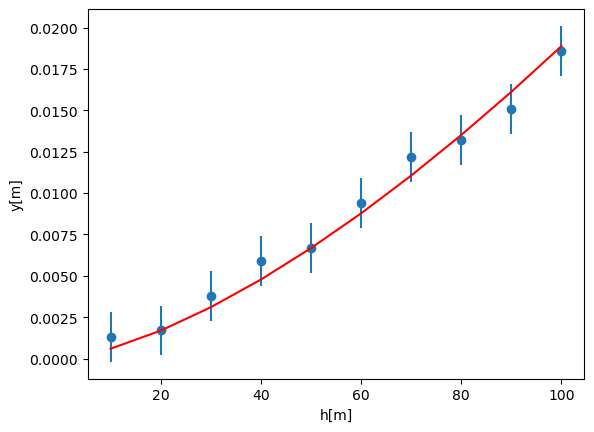

In [8]:
plt.errorbar(lambda30['h'], lambda30['y'], lambda30['sigmay'], linestyle='')
plt.plot(lambda30['h'], o, color='r')
plt.scatter(lambda30['h'], lambda30['y'])
plt.xlabel('h[m]')
plt.ylabel('y[m]')

## Propagación de la incertidumbre de la aceleración de la gravedad:

In [9]:
Gravedad = []
lambda30y = lambda30.copy()

for n in range(300):
    j=9.81+np.random.normal(loc=0, scale=1)
    Gravedad.append(j)
    
    
Gravedad[:10]

np.mean(Gravedad)

9.803097371310326

In [10]:
omega2 = []
for i in range(300):
    lambda30y['y']
    sigy = lambda30y['sigmay'].iloc[0]
    mod = lambda30['y']+np.random.normal(loc=0,scale= sigy, size=len(lambda30['y']))
    lambda30y['y']=mod

    lmb2 = lambda p: Chi2(lambda30y['h'], lambda30y['y'], lambda30y['sigmay'], lambda30y['angle'], Gravedad[i], p)
    om = optimize.minimize(lmb2, x0=[1], method='Nelder-Mead').x[0]
    omega2.append(om)
Omega = np.array(omega2)
np.mean(Omega)

7.245190938224991e-05

In [11]:
H2,binsx,binsy = np.histogram2d(Omega, Gravedad, bins=(30,30))

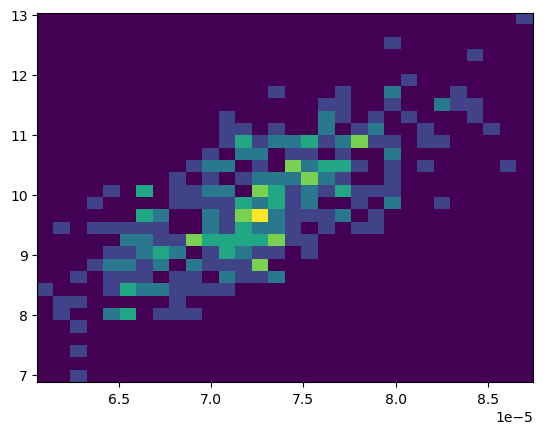

In [12]:
plt.imshow(H2.T,origin='lower',extent=[binsx[0],binsx[-1],binsy[0],binsy[-1]],aspect='auto',cmap='viridis')

In [13]:
print(np.corrcoef(Omega, Gravedad), 
      '\n Están altamente correlacionadas ya que el coeficiente de correlación es cercano a 1.')

[[1.         0.72655984]
 [0.72655984 1.        ]] 
 Están altamente correlacionadas ya que el coeficiente de correlación es cercano a 1.


In [14]:
H1 = np.sum(H2,axis=1)
H1

array([ 1.,  3.,  5.,  3.,  9., 13., 15., 12., 10., 12., 17., 20., 24.,
       28., 23., 14., 17., 14., 15.,  9.,  7., 12.,  2.,  3.,  4.,  2.,
        3.,  1.,  1.,  1.])

In [15]:
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )

In [16]:
ij,ii,ji

(5, 15, 25)

In [74]:
H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(binsx,binsy))

In [77]:
c = np.std(H1)/np.sqrt(len(H1))
z_score = 
upper_limit = np.mean(H1) + z_score * c 
lower_limit = np.mean(H1) - z_score *c

7.54983443527075

## Generalizando para todo λ:

In [17]:
def Graph(lam):
    lmb = lambda p: Chi2(lam['h'], lam['y'], lam['sigmay'], lam['angle'], 9.81, p)
    omegahat=optimize.minimize(lmb, x0=[1], method='Nelder-Mead').x[0]
    o = np.array(modelo(lam['h'], lam['angle'], 9.81, omegahat))
    plt.errorbar(lam['h'], lam['y'], lam['sigmay'], linestyle='')
    plt.plot(lam['h'], o, color='r')
    plt.scatter(lam['h'], lam['y'])
    plt.xlabel('h[m]')
    plt.ylabel('y[m]')    
    plt.show()
    return omegahat

λ=10


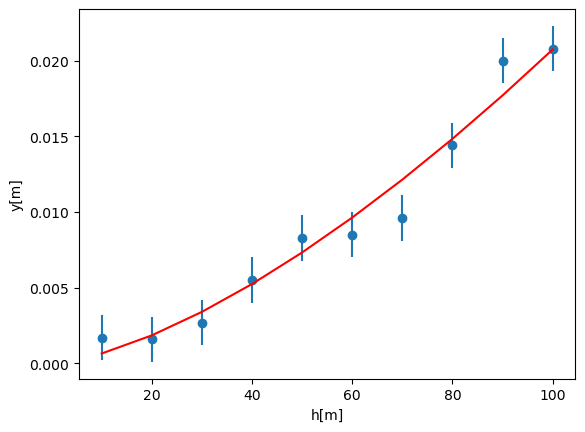

omegahat:  6.995201110751032e-05
λ=20


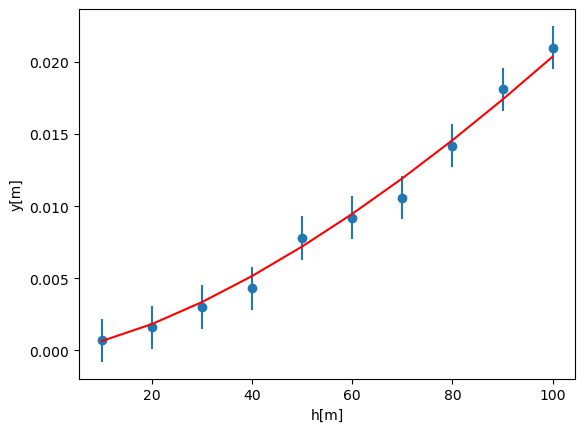

omegahat:  7.200241088778378e-05
λ=40


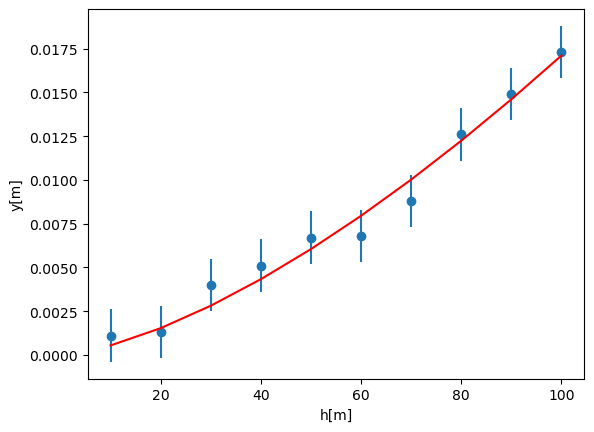

omegahat:  7.419586181551814e-05
λ=50


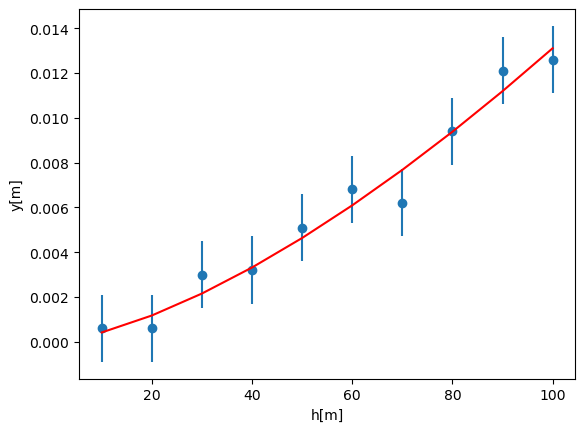

omegahat:  6.771087646395563e-05
λ=60


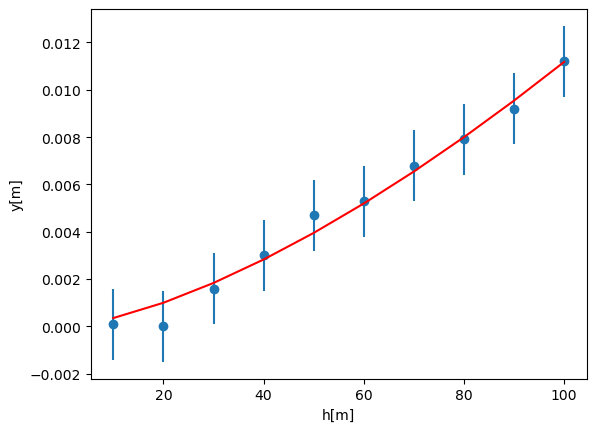

omegahat:  7.429122924715876e-05


In [18]:
print('λ=10')
print('omegahat: ', Graph(lambda10))

print('λ=20')
print('omegahat: ', Graph(lambda20))

print('λ=40')
print('omegahat: ', Graph(lambda40))

print('λ=50')
print('omegahat: ', Graph(lambda50))

print('λ=60')
print('omegahat: ', Graph(lambda60))

In [50]:
def prop(lam):
    Gravedad = []
    lambday = lam.copy()

    for n in range(300):
        j=9.81+np.random.normal(loc=0, scale=1)
        Gravedad.append(j)
    Gravedad[:10]
    
    omega2 = []
    for i in range(300):
        lambday['y']
        sigy = lambday['sigmay'].iloc[0]
        mod = lam['y']+np.random.normal(loc=0,scale= sigy, size=len(lam['y']))
        lambday['y']=mod
        lmb2 = lambda p: Chi2(lambday['h'], lambday['y'], lambday['sigmay'], lambday['angle'], Gravedad[i], p)
        om = optimize.minimize(lmb2, x0=[1], method='Nelder-Mead').x[0]
        omega2.append(om)
    Omega = np.array(omega2)
    
    H2,binsx,binsy = np.histogram2d(Omega, Gravedad, bins=(30,30))
    plt.imshow(H2.T,origin='lower',extent=[binsx[0],binsx[-1],binsy[0],binsy[-1]],aspect='auto',cmap='viridis')
    return H2

λ=10


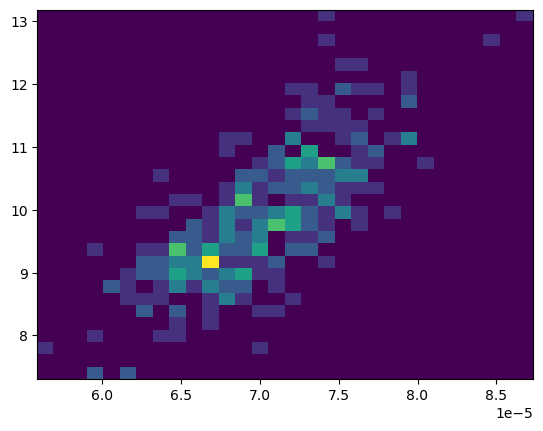

In [63]:
print('λ=10')
H210 = prop(lambda10)

λ=20


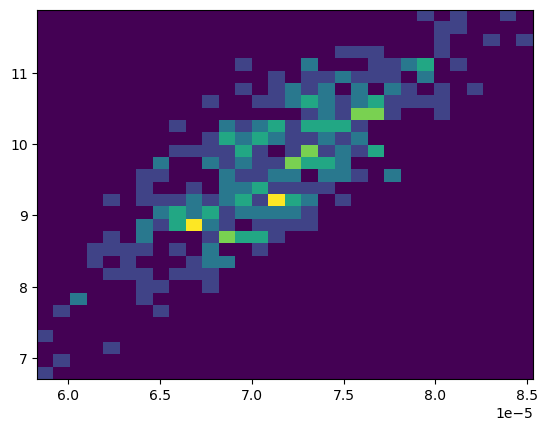

In [64]:
print('λ=20')
H220 = prop(lambda20)

λ=40


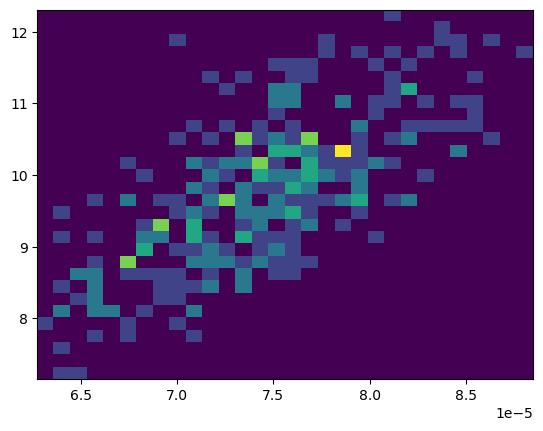

In [65]:
print('λ=40')
H240 = prop(lambda40)

λ=50


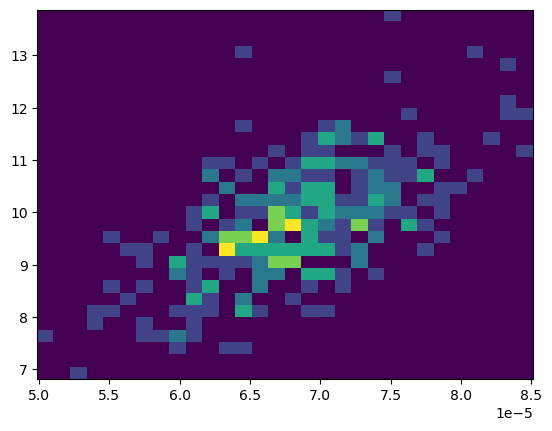

In [66]:
print('λ=50')
H250 = prop(lambda50)

λ=60


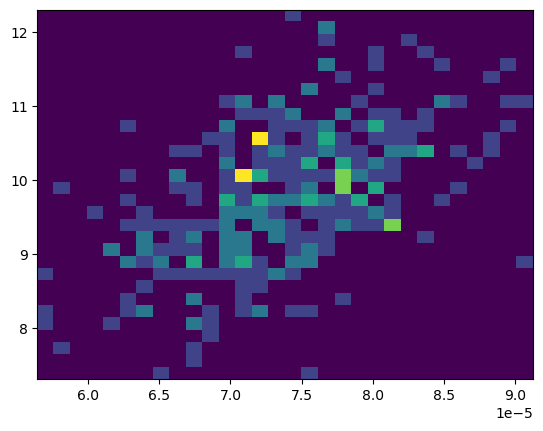

In [67]:
print('λ=60')
H260 = prop(lambda60)

In [71]:
def Ha(H2):
    H1 = np.sum(H2,axis=1)
    cs = np.cumsum(H1)
    ij = np.searchsorted( cs, np.percentile(cs,16) )
    ii = np.searchsorted( cs, np.percentile(cs,50) )
    ji = np.searchsorted( cs, np.percentile(cs,84) )
    return ij, ii, ji

In [72]:
print('Lambda 10:',Ha(H210),
      '\nLambda 20:',Ha(H220),
      '\nLambda 40:',Ha(H240),
      '\nLambda 50:',Ha(H250),
      '\nLambda 60:',Ha(H260))

Lambda 10: (5, 15, 23) 
Lambda 20: (5, 15, 25) 
Lambda 40: (5, 15, 25) 
Lambda 50: (5, 15, 25) 
Lambda 60: (5, 15, 25)
